### Análise dos Dados Experimentais: Lei da Radiação de Stefan-Boltzmann
#### Paulo Henrique Lorenzoni Filho

In [1]:
from uncertainties import ufloat, unumpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
i1=ufloat(0.100,0.001)
i2=ufloat(0.139,0.001)
t1=ufloat(19.4,0.1)
t2=ufloat(27.0,0.1)
R=((t2-t1)*10**(-3))/(i2-i1)
R


0.19487179487179487+/-0.007942513412749723

In [3]:
a=4.82*10**(-3)
b=6.76*10**(-7)
T_A=27
R_0=R/(1+a*T_A+b*(T_A)**2)
R_0

0.17235639562408706+/-0.007024838996931954

In [4]:
tensao=unumpy.uarray([0.4,1.1,2.9,5.6,8.8,12.1,16.7,21.6],[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
ddp=unumpy.uarray([1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00],[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
corrente=unumpy.uarray([1.97,2.64,3.23,3.75,4.21,4.60,5.04,5.43],[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])

In [5]:
r=(ddp)/corrente
r

array([0.5076142131979695+/-0.005692689580959978,
       0.7575757575757576+/-0.004752121566686054,
       0.9287925696594427+/-0.004225360453114263,
       1.0666666666666667+/-0.0038989710576820104,
       1.187648456057007+/-0.0036878416916676527,
       1.3043478260869565+/-0.00357297886038484,
       1.3888888888888888+/-0.0033957058643627343,
       1.4732965009208103+/-0.0032792239312217594], dtype=object)

In [6]:
T=((a**2+(r/R_0 -1)*4*b)**(1/2)-a)/(2*b)+273

In [7]:
u=np.array([0.3,1.1,2.9,5.6,8.8,12.1,16.7,21.6])#Tensao no sensor
t=unumpy.nominal_values(T)
y=np.log10(u)
x=np.log10(t)
model=LinearRegression()
X=x.reshape(-1,1)
model.fit(X,y);


In [8]:
ajuste=model.coef_[0]*x+model.intercept_ 


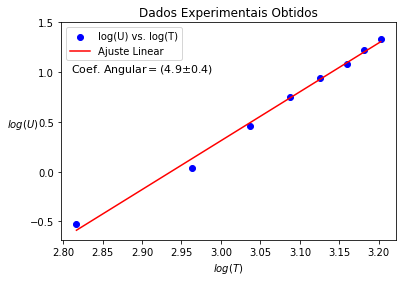

In [9]:
fig,ax=plt.subplots()
ax.set_title('Dados Experimentais Obtidos')
ax.set_xlabel('$log(T)$')
ax.set_ylabel('$log(U)$', rotation=0,labelpad=7)
ax.scatter(x,y, color='blue', label='log(U) vs. log(T)')
ax.plot(x,ajuste,color='red',label='Ajuste Linear')
ax.axes.set_yticks(np.arange(-0.5,1.75,0.5))
ax.legend(loc=0)
ax.text(2.81,1,'Coef. Angular$=(4.9 ± 0.4)$',fontsize=11)
plt.savefig('Q1.png',dpi=300,facecolor='w')
plt.show()